In [1]:
from tensorflow import keras

In [2]:
from pylab import *

In [3]:
from sklearn.datasets import make_classification

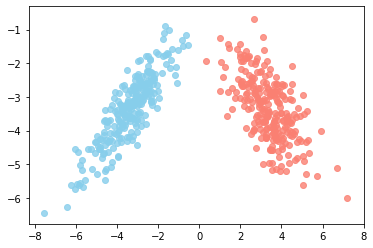

In [4]:
X, Y = make_classification(
    n_samples=500, 
    n_features=2, 
    n_clusters_per_class=1, 
    n_redundant=0,
    class_sep=3.4,
    random_state=20
)

Y = Y.reshape(500, 1)

scatter(X[Y[:,0]==0, 0], X[Y[:,0]==0, 1], color="skyblue", alpha=0.8)
scatter(X[Y[:,0]==1, 0], X[Y[:,0]==1, 1], color="salmon", alpha=0.8)

show()

In [5]:
model = keras.Sequential()

In [6]:
model.add(keras.layers.Dense(
    1, activation='sigmoid', input_dim=2
))

In [7]:
model.compile(
    optimizer='sgd', loss='binary_crossentropy'
)

In [8]:
r = model.fit(X, Y, epochs=1000, verbose=0)

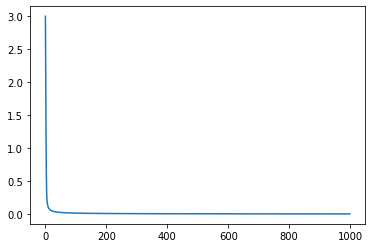

In [9]:
plot(r.history['loss'])

In [10]:
print(r.history['loss'][-1])

0.0036429324592463673


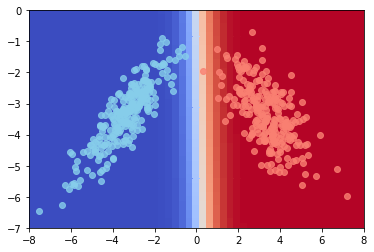

In [11]:
res = 50

_x0 = np.linspace(-8, 8, res)
_x1 = np.linspace(0, -7, res)
            
_Y = np.zeros((res, res))
            
for i0, x0 in enumerate(_x0):
    for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = model(array([[x0, x1]], dtype='float32'))
                    
plt.pcolormesh(_x0, _x1, _Y.T, cmap="coolwarm")
            
plt.scatter(X[Y[:,0]==0, 0], X[Y[:,0]==0, 1], color="skyblue", alpha=0.8)
plt.scatter(X[Y[:,0]==1, 0], X[Y[:,0]==1, 1], color="salmon", alpha=0.8)